<a href="https://colab.research.google.com/github/pkrakula/Project/blob/main/Log_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('Zookeeper_latest.log', sep="INFO",header=None,error_bad_lines=False)
print(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


                                0                                                  1
0      2015-07-29 17:41:41,536 -     [main:QuorumPeerConfig@101] - Reading config...
1      2015-07-29 17:41:41,544 -     [main:QuorumPeerConfig@334] - Defaulting to ...
2      2015-07-29 17:41:41,555 -     [main:DatadirCleanupManager@78] - autopurge....
3      2015-07-29 17:41:41,555 -     [main:DatadirCleanupManager@79] - autopurge....
4      2015-07-29 17:41:41,557 -     [main:DatadirCleanupManager@101] - Purge tas...
...                           ...                                                ...
74375  2015-08-25 11:26:27,898 -     [WorkerReceiver[myid=3]:FastLeaderElection@5...
74376  2015-08-25 11:26:28,138 -     [LearnerHandler-/10.10.34.12:38330:LearnerHa...
74377  2015-08-25 11:26:28,159 -     [LearnerHandler-/10.10.34.12:38330:LearnerHa...
74378  2015-08-25 11:26:28,159 -     [LearnerHandler-/10.10.34.12:38330:LearnerHa...
74379  2015-08-25 11:26:28,159 -     [LearnerHandler-/10.10.34.12

In [2]:
import sklearn

In [3]:
print(sklearn.__version__)

0.22.2.post1


In [4]:
df

,0,1
0,"2015-07-29 17:41:41,536 -",[main:QuorumPeerConfig@101] - Reading config...
1,"2015-07-29 17:41:41,544 -",[main:QuorumPeerConfig@334] - Defaulting to ...
2,"2015-07-29 17:41:41,555 -",[main:DatadirCleanupManager@78] - autopurge....
3,"2015-07-29 17:41:41,555 -",[main:DatadirCleanupManager@79] - autopurge....
4,"2015-07-29 17:41:41,557 -",[main:DatadirCleanupManager@101] - Purge tas...
...,...,...
74375,"2015-08-25 11:26:27,898 -",[WorkerReceiver[myid=3]:FastLeaderElection@5...
74376,"2015-08-25 11:26:28,138 -",[LearnerHandler-/10.10.34.12:38330:LearnerHa...
74377,"2015-08-25 11:26:28,159 -",[LearnerHandler-/10.10.34.12:38330:LearnerHa...
74378,"2015-08-25 11:26:28,159 -",[LearnerHandler-/10.10.34.12:38330:LearnerHa...


In [5]:
df.columns=['Date&Time','Message']

In [6]:
df

,Date&Time,Message
0,"2015-07-29 17:41:41,536 -",[main:QuorumPeerConfig@101] - Reading config...
1,"2015-07-29 17:41:41,544 -",[main:QuorumPeerConfig@334] - Defaulting to ...
2,"2015-07-29 17:41:41,555 -",[main:DatadirCleanupManager@78] - autopurge....
3,"2015-07-29 17:41:41,555 -",[main:DatadirCleanupManager@79] - autopurge....
4,"2015-07-29 17:41:41,557 -",[main:DatadirCleanupManager@101] - Purge tas...
...,...,...
74375,"2015-08-25 11:26:27,898 -",[WorkerReceiver[myid=3]:FastLeaderElection@5...
74376,"2015-08-25 11:26:28,138 -",[LearnerHandler-/10.10.34.12:38330:LearnerHa...
74377,"2015-08-25 11:26:28,159 -",[LearnerHandler-/10.10.34.12:38330:LearnerHa...
74378,"2015-08-25 11:26:28,159 -",[LearnerHandler-/10.10.34.12:38330:LearnerHa...


In [7]:
df=df.head(25000)

In [8]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
STOPWORDS=stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

In [11]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [12]:
import string   
import re

def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation

    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    stemmed=[ps.stem(token) for token in tokens]
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    return text_cleaned

In [13]:
df['Message']=df['Message'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df['cleaned_comments']=df['Message'].apply(lambda x:clean_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
from collections import Counter
dt=df['Message']
p = Counter(" ".join(dt).split()).most_common(50)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

                                                 Word  Frequency
0                                                None      16806
1                                                   -       8228
2                                          connection       4770
3                                             request       3530
4   [/10.10.34.11:3888:QuorumCnxManager$Listener@493]       3524
5                                            Received       3524
6                                             session       1897
7                                                 for       1552
8                                              socket       1246
9                                              client       1238
10                                            timeout        944
11  [QuorumPeer[myid=1]/0:0:0:0:0:0:0:0:2181:FastL...        772
12                                       Notification        772
13                                               time        772
14                       

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
!pip install wordcloud

In [18]:
X=df[['cleaned_comments']]

In [19]:
X

,cleaned_comments
0,mainquorumpeerconfig101 read configur etczook...
1,mainquorumpeerconfig334 default major quorum
2,maindatadircleanupmanager78 autopurgesnapreta...
3,maindatadircleanupmanager79 autopurgepurgeint...
4,maindatadircleanupmanager101 purg task schedul
...,...
24995,none
24996,none
24997,quorumpeermyid1000000002181fastleaderelection...
24998,none


In [20]:
X=X[X['cleaned_comments'] != 'none']

In [21]:
X

,cleaned_comments
0,mainquorumpeerconfig101 read configur etczook...
1,mainquorumpeerconfig334 default major quorum
2,maindatadircleanupmanager78 autopurgesnapreta...
3,maindatadircleanupmanager79 autopurgepurgeint...
4,maindatadircleanupmanager101 purg task schedul
...,...
24985,quorumpeermyid1000000002181fastleaderelection...
24988,quorumpeermyid1000000002181fastleaderelection...
24991,quorumpeermyid1000000002181fastleaderelection...
24994,quorumpeermyid1000000002181fastleaderelection...


In [22]:
X_data=X.iloc[:,:].values

In [23]:
X_data

array([[' mainquorumpeerconfig101 read configur etczookeeperconfzoocfg'],
       [' mainquorumpeerconfig334 default major quorum'],
       [' maindatadircleanupmanager78 autopurgesnapretaincount set 3'],
       ...,
       [' quorumpeermyid1000000002181fastleaderelection774 notif time 60000'],
       [' quorumpeermyid1000000002181fastleaderelection774 notif time 60000'],
       [' quorumpeermyid1000000002181fastleaderelection774 notif time 60000']],
      dtype=object)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=100,ngram_range=(1,1))
X_data_vectored = vectorizer.fit_transform(X_data.ravel())

In [25]:
X_data_vectored

<8194x100 sparse matrix of type '<class 'numpy.float64'>'
	with 38840 stored elements in Compressed Sparse Row format>

In [26]:
!pip install sparse

In [27]:
X_data_array=X_data_vectored.toarray()

In [28]:
X_data_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
X_data_array.shape

(8194, 100)

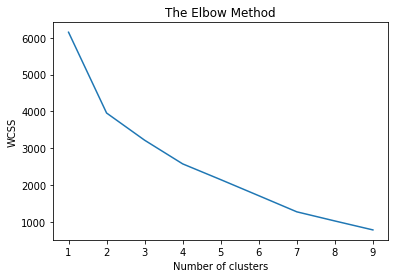

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_data_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**K Measn Clustering**

In [31]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_data_array)

**Labels**

In [32]:
print(y_kmeans)

[1 1 1 ... 1 1 1]


**Gaussian Mixture Models**

In [33]:
import numpy as np
from sklearn.mixture import GaussianMixture

In [34]:
gm = GaussianMixture(n_components=5, random_state=0).fit(X_data_array)

In [35]:
y_gmm=gm.predict(X_data_array)

In [36]:
y_gmm

array([0, 0, 0, ..., 2, 2, 2])

**RCC**

In [37]:
import pyrrcc
import numpy as np
from sklearn.metrics import adjusted_mutual_info_score

clusterer = pyrrcc.RccCluster(k=2,measure='euclidean')

P = clusterer.fit(X_data_array)

mu = 3.003000532453541, lambda = 996.1071124561994, epsilon = 0.2850489914417267, delta = 0.2850489914417267
 Iter | Data 	 | Smooth 	 | Obj 	
 1 | 0.0 | 87.5291060025376 | 87.5291060025376
 2 | 3.554526466716865 | 0.5409066267879743 | 4.095433093504839
 3 | 3.706921947826461 | 0.35055850162765056 | 4.057480449454111
 4 | 3.707714512076688 | 0.3496581121394498 | 4.057372624216137
 5 | 3.7070447292924076 | 0.349892952914571 | 4.0569376822069785
 6 | 3.705316933044345 | 0.35073798732056605 | 4.056054920364911
 7 | 3.7018100763894086 | 0.3524260988787108 | 4.0542361752681195


In [38]:
P

array([   0,    1,    2, ..., 8085, 8086, 8087], dtype=int32)

**BIRCH Clustering**

In [39]:
#BIRCH

In [40]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=5)
brc.fit(X_data_array)
y_pred=brc.predict(X_data_array)

In [41]:
y_pred

array([3, 0, 2, ..., 0, 0, 0])

**RCC with DR ( PCA)**

In [42]:
X_data_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
X_data_array.shape

(8194, 100)

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_data_array_DR=pca.fit_transform(X_data_array)

In [45]:
X_data_array_DR.shape

(8194, 10)

In [47]:
import pyrrcc
import numpy as np
from sklearn.metrics import adjusted_mutual_info_score

clusterer = pyrrcc.RccCluster(measure='cosine')

P = clusterer.fit(X_data_array_DR)

mu = 0.6488812345964261, lambda = 3.247881947439824, epsilon = 0.33462753891944885, delta = 0.33462753891944885
 Iter | Data 	 | Smooth 	 | Obj 	
 1 | 0.0 | 0.17464103105492274 | 0.17464103105492274
 2 | 0.02386845012508357 | 0.06740245881361918 | 0.09127090893870275
 3 | 0.0270969887986148 | 0.0577694022580845 | 0.0848663910566993


In [48]:
P

array([   0,    1,    2, ..., 5179, 5179, 5179], dtype=int32)

**Streamming Data Clustering with Robust Continuous Clustering with DR**

In [52]:
streamming_dataset=pd.read_csv('/content/streamming_log.csv')

In [53]:
streamming_dataset['cleaned_comments'][0:10]

0     mainquorumpeerconfig101 read configur etczook...
1         mainquorumpeerconfig334 default major quorum
2     maindatadircleanupmanager78 autopurgesnapreta...
3     maindatadircleanupmanager79 autopurgepurgeint...
4       maindatadircleanupmanager101 purg task schedul
5              mainquorumpeermain127 start quorum peer
6     mainnioservercnxnfactory94 bind port 00000000...
7                   mainquorumpeer913 ticktim set 2000
8            mainquorumpeer933 minsessiontimeout set 1
9            mainquorumpeer944 maxsessiontimeout set 1
Name: cleaned_comments, dtype: object

In [54]:
streamming_dataset=streamming_dataset.drop_duplicates()

In [55]:
streamming_dataset

,Unnamed: 0,cleaned_comments
0,0,mainquorumpeerconfig101 read configur etczook...
1,1,mainquorumpeerconfig334 default major quorum
2,2,maindatadircleanupmanager78 autopurgesnapreta...
3,3,maindatadircleanupmanager79 autopurgepurgeint...
4,4,maindatadircleanupmanager101 purg task schedul
...,...,...
8189,24985,quorumpeermyid1000000002181fastleaderelection...
8190,24988,quorumpeermyid1000000002181fastleaderelection...
8191,24991,quorumpeermyid1000000002181fastleaderelection...
8192,24994,quorumpeermyid1000000002181fastleaderelection...


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=50,ngram_range=(2,3))
import pyrrcc
from sklearn.manifold import TSNE
import numpy as np
from sklearn.metrics import adjusted_mutual_info_score


In [62]:
def streamming_rcc(streamming_log_batch,vectorizer):
  print(current_batch_log)
  log_vectorized= vectorizer.fit_transform(current_batch_log.ravel())
  vectorized_log_array=log_vectorized.toarray()
  X_embedded = TSNE(n_components=2).fit_transform(vectorized_log_array)
  clusterer = pyrrcc.RccCluster(k=5,measure='euclidean')
  current_stream_label = clusterer.fit(X_embedded)
  print(current_stream_label)

In [64]:
i,j=0,1000
for k in range(len(streamming_dataset['cleaned_comments'])):
  if i<len(streamming_dataset['cleaned_comments']):
     current_batch_log=streamming_dataset['cleaned_comments'][i:j]
     streamming_rcc(current_batch_log,vectorizer)
     j=j+1000
     i=i+1000

0       mainquorumpeerconfig101 read configur etczook...
1           mainquorumpeerconfig334 default major quorum
2       maindatadircleanupmanager78 autopurgesnapreta...
3       maindatadircleanupmanager79 autopurgepurgeint...
4         maindatadircleanupmanager101 purg task schedul
                             ...                        
995     101034113888quorumcnxmanagerlistener493 recei...
996     101034113888quorumcnxmanagerlistener493 recei...
997     101034113888quorumcnxmanagerlistener493 recei...
998     101034113888quorumcnxmanagerlistener493 recei...
999     101034113888quorumcnxmanagerlistener493 recei...
Name: cleaned_comments, Length: 1000, dtype: object
mu = 0.30424078142913213, lambda = 12.517214298942196, epsilon = 0.01454212423413992, delta = 0.01454212423413992
 Iter | Data 	 | Smooth 	 | Obj 	
 1 | 0.0 | 96.58938362735283 | 96.58938362735283
 2 | 8.415861834338278 | 27.958278951907523 | 36.3741407862458
 3 | 9.233234106839456 | 26.88423623777851 | 36.1174703446179